In [2]:
import pandas as pd
data = pd.read_csv("collegePlace.csv")

In [29]:
#Exploratory Data Analysis

data.shape

(2966, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
#Identify Numerical and Categorical Data

import numpy as np
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
print("Number of numerical variables: ", numeric_data.shape[1])
print("Numerical attributes: ", numeric_data.columns)

Number of numerical variables:  6
Numerical attributes:  Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'PlacedOrNot'],
      dtype='object')


In [6]:
print("Number of categorical variables: ", categorical_data.shape[1])
print("Categorical attributes: ")
print(categorical_data.columns)

Number of categorical variables:  2
Categorical attributes: 
Index(['Gender', 'Stream'], dtype='object')


In [11]:
data['Stream'].replace({'Electronics And Communication':'0','Computer Science':'1','Information Technology':'2','Mechanical':'3','Electrical':'4','Civil':'5'},inplace=True)

In [13]:
data['Gender'].replace({'Male':'1','Female':'0'},inplace=True)

In [16]:
data["Gender"] = pd.to_numeric(data["Gender"])
data["Stream"] = pd.to_numeric(data["Stream"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


In [17]:
#Apply Feature Engineering and Feature Scaling

from sklearn import preprocessing
#Feature scaling - min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
encD = data
encD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


In [18]:
#Train the Model

#Split into input attributes and target

cols=['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']
X=encD[cols]
y=encD['PlacedOrNot']
#Split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
#Train the model
from sklearn.naive_bayes import GaussianNB
gNBmodel = GaussianNB()
gNBmodel.fit(X_train,y_train)

GaussianNB()

In [19]:
#est Model and Display Results

y_pred = gNBmodel.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [20]:
#Accuracy Score

print('Accuracy of Gaussian Naive Bayes on test set: {:.2f}'.format
(gNBmodel.score(X_test, y_test)))

Accuracy of Gaussian Naive Bayes on test set: 0.80


In [22]:
#Check for Overfitting and Underfitting

from sklearn.metrics import mean_absolute_error
y_train_pred = gNBmodel.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_pred)
print(mae_train)
print(mae_test)

0.18634064080944351
0.20033670033670034


In [25]:
if mae_train < mae_test:
    print("Overfitting is present")
else:
    print("Underfitting is present")

Overfitting is present


In [26]:
#Summarise Performance with Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[206,  46],
       [ 73, 269]])

In [27]:
#Evaluate the Model with Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       252
           1       0.85      0.79      0.82       342

    accuracy                           0.80       594
   macro avg       0.80      0.80      0.80       594
weighted avg       0.80      0.80      0.80       594



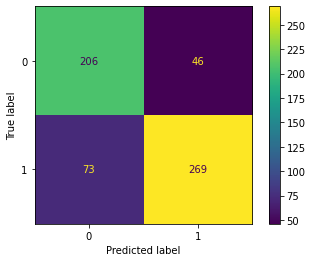

In [28]:
#Analyse model performance visually

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=gNBmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=gNBmodel.classes_)
disp.plot()